In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

df = pd.read_csv("/content/adult_with_headers.csv")
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# 1. Data Exploration and Preprocessing
# Select numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Apply scaling
standard_scaled = standard_scaler.fit_transform(df[numerical_features])
min_max_scaled = min_max_scaler.fit_transform(df[numerical_features])

# Convert the results to DataFrames for better comparison
standard_scaled_df = pd.DataFrame(standard_scaled, columns=numerical_features)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=numerical_features)

standard_scaled_df.describe()
min_max_scaled_df.describe()



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 2. Encoding Techniques
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('income')  # Exclude the target variable

# Determine the number of unique values in each categorical feature
unique_values = df[categorical_features].nunique()
unique_values

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42


In [6]:
# One-Hot Encoding to features with fewer than 5 unique values
one_hot_features = unique_values[unique_values < 5].index.tolist()
label_features = unique_values[unique_values >= 5].index.tolist()

# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Label Encoding
label_encoder = LabelEncoder()
label_encoded_df = df[label_features].apply(label_encoder.fit_transform)

# Combine the encoded features back with the original DataFrame
df_encoded = df.drop(columns=one_hot_features + label_features)
df_encoded = pd.concat([df_encoded, one_hot_encoded_df, label_encoded_df], axis=1)
df_encoded.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,sex_ Male,workclass,education,marital_status,occupation,relationship,race,native_country
0,39,77516,13,2174,0,40,<=50K,1.0,7,9,4,1,1,4,39
1,50,83311,13,0,0,13,<=50K,1.0,6,9,2,4,0,4,39
2,38,215646,9,0,0,40,<=50K,1.0,4,11,0,6,1,4,39
3,53,234721,7,0,0,40,<=50K,1.0,4,1,2,6,0,2,39
4,28,338409,13,0,0,40,<=50K,0.0,4,9,2,10,5,2,5


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# a. Creating New Features
# 1. Capital Gain/Loss Indicator
df_encoded['capital_gain_loss_indicator'] = np.where((df_encoded['capital_gain'] > 0) | (df_encoded['capital_loss'] > 0), 1, 0)

# 2. Work Hours Category
# Categorize hours_per_week: < 30 (Part-time), 30-40 (Full-time), > 40 (Over-time)
df_encoded['work_hours_category'] = pd.cut(df_encoded['hours_per_week'],
                                           bins=[0, 30, 40, np.inf],
                                           labels=['Part-time', 'Full-time', 'Over-time'])

# Apply One-Hot Encoding to 'work_hours_category'
work_hours_category_encoded = pd.get_dummies(df_encoded['work_hours_category'], prefix='work_hours')

# Add the new features to the dataframe
df_encoded = pd.concat([df_encoded, work_hours_category_encoded], axis=1)
df_encoded.drop(columns=['work_hours_category'], inplace=True)


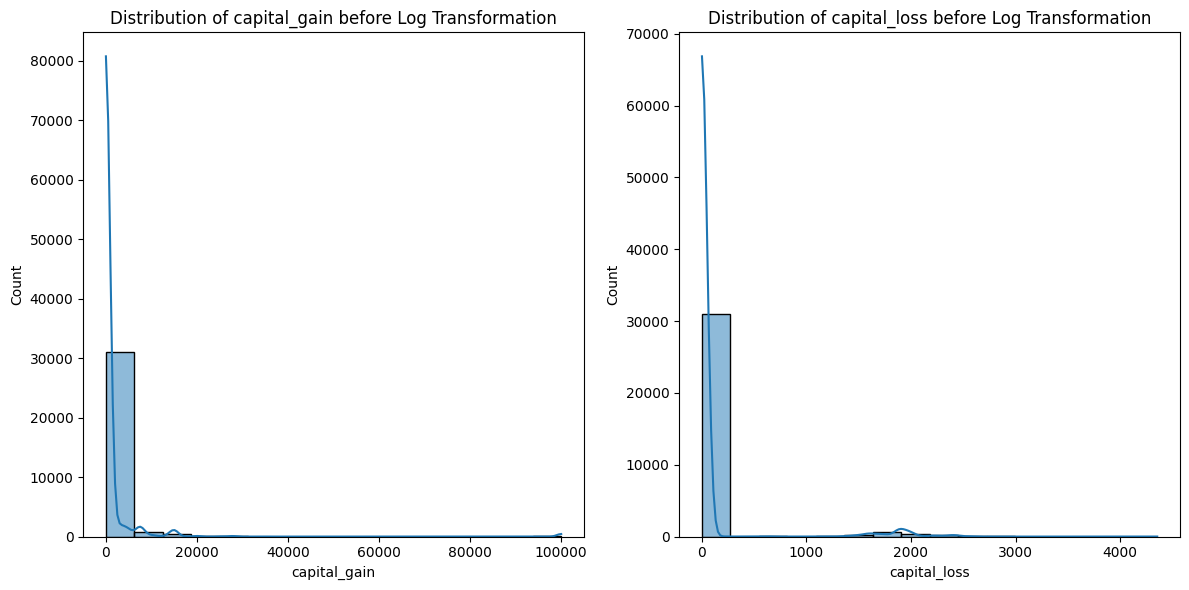

In [9]:
# b. Transformation of Skewed Features
# Check the distribution of numerical features
skewed_features = ['capital_gain', 'capital_loss']

# Plot the distributions before transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, feature in enumerate(skewed_features):
    sns.histplot(df_encoded[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature} before Log Transformation')

plt.tight_layout()
plt.show()



In [10]:
# log transformation to correct skewness
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])
df_encoded['capital_loss_log'] = np.log1p(df_encoded['capital_loss'])

# Dropped the original columns
df_encoded.drop(columns=['capital_gain', 'capital_loss'], inplace=True)

# the updated dataframe
df_encoded.head()

,age,fnlwgt,education_num,hours_per_week,income,sex_ Male,workclass,education,marital_status,occupation,relationship,race,native_country,capital_gain_loss_indicator,work_hours_Part-time,work_hours_Full-time,work_hours_Over-time,capital_gain_log,capital_loss_log
0,39,77516,13,40,<=50K,1.0,7,9,4,1,1,4,39,1,0,1,0,7.684784,0.0
1,50,83311,13,13,<=50K,1.0,6,9,2,4,0,4,39,0,1,0,0,0.000000,0.0
2,38,215646,9,40,<=50K,1.0,4,11,0,6,1,4,39,0,0,1,0,0.000000,0.0
3,53,234721,7,40,<=50K,1.0,4,1,2,6,0,2,39,0,0,1,0,0.000000,0.0
4,28,338409,13,40,<=50K,0.0,4,9,2,10,5,2,5,0,0,1,0,0.000000,0.0


In [11]:
# Isolation Forest for Outlier Detection

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fitting the model
numerical_data = df_encoded.select_dtypes(include=[np.number])
outliers = iso_forest.fit_predict(numerical_data)

# Add the outlier predictions to the dataset
df_encoded['outlier'] = outliers

# Remove outliers (where outlier = -1)
df_cleaned = df_encoded[df_encoded['outlier'] != -1].drop(columns=['outlier'])
df_cleaned.head()


,age,fnlwgt,education_num,hours_per_week,income,sex_ Male,workclass,education,marital_status,occupation,relationship,race,native_country,capital_gain_loss_indicator,work_hours_Part-time,work_hours_Full-time,work_hours_Over-time,capital_gain_log,capital_loss_log
0,39,77516,13,40,<=50K,1.0,7,9,4,1,1,4,39,1,0,1,0,7.684784,0.0
1,50,83311,13,13,<=50K,1.0,6,9,2,4,0,4,39,0,1,0,0,0.000000,0.0
2,38,215646,9,40,<=50K,1.0,4,11,0,6,1,4,39,0,0,1,0,0.000000,0.0
3,53,234721,7,40,<=50K,1.0,4,1,2,6,0,2,39,0,0,1,0,0.000000,0.0
4,28,338409,13,40,<=50K,0.0,4,9,2,10,5,2,5,0,0,1,0,0.000000,0.0


In [12]:
!pip install ppscore
import ppscore as pps

# Calculate the PPS matrix
pps_matrix = pps.matrix(df_cleaned)

# Filter out low PPS values for better visibility
pps_matrix_filtered = pps_matrix[pps_matrix['ppscore'] > 0.1]
pps_matrix_filtered

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,age,marital_status,0.170543,regression,True,mean absolute error,1.161200,0.963166,DecisionTreeRegressor()
20,fnlwgt,fnlwgt,1.000000,predict_itself,True,None,0.000000,1.000000,None
40,education_num,education_num,1.000000,predict_itself,True,None,0.000000,1.000000,None
42,education_num,income,0.212717,classification,True,weighted F1,0.659345,0.731808,DecisionTreeClassifier()
45,education_num,education,1.000000,regression,True,mean absolute error,2.694800,0.000000,DecisionTreeRegressor()
60,hours_per_week,hours_per_week,1.000000,predict_itself,True,None,0.000000,1.000000,None
71,hours_per_week,work_hours_Part-time,0.998718,regression,True,mean absolute error,0.156000,0.000200,DecisionTreeRegressor()
72,hours_per_week,work_hours_Full-time,0.999550,regression,True,mean absolute error,0.444800,0.000200,DecisionTreeRegressor()
73,hours_per_week,work_hours_Over-time,1.000000,regression,True,mean absolute error,0.288800,0.000000,DecisionTreeRegressor()


In [13]:
#the correlation matrix for comparison
correlation_matrix = df_cleaned.corr()
correlation_matrix


<ipython-input-13-973f870f1045>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


,age,fnlwgt,education_num,hours_per_week,sex_ Male,workclass,education,marital_status,occupation,relationship,race,native_country,capital_gain_loss_indicator,work_hours_Part-time,work_hours_Full-time,work_hours_Over-time,capital_gain_log,capital_loss_log
age,1.000000,-0.077297,0.036671,0.078250,0.095051,0.008732,-0.008068,-0.276188,-0.018137,-0.269546,0.029578,0.006491,0.119646,-0.093324,0.005525,0.068697,0.114125,0.048350
fnlwgt,-0.077297,1.000000,-0.044038,-0.020123,0.028637,-0.017455,-0.029098,0.028578,0.001894,0.005814,-0.025072,-0.055610,-0.014221,-0.003365,0.032748,-0.033094,-0.008400,-0.011108
education_num,0.036671,-0.044038,1.000000,0.150796,0.012386,0.051659,0.356574,-0.067436,0.108773,-0.097251,0.035806,0.054906,0.142278,-0.103393,-0.088625,0.179652,0.130109,0.074439
hours_per_week,0.078250,-0.020123,0.150796,1.000000,0.231521,0.135035,0.057577,-0.192280,0.075280,-0.253431,0.042798,-0.001651,0.106598,-0.703118,-0.101766,0.674278,0.095995,0.055214
sex_ Male,0.095051,0.028637,0.012386,0.231521,1.000000,0.092472,-0.030020,-0.128991,0.078101,-0.581125,0.086250,-0.013895,0.095040,-0.173455,-0.062887,0.207630,0.081742,0.050984
workclass,0.008732,-0.017455,0.051659,0.135035,0.092472,1.000000,0.022363,-0.062304,0.247046,-0.088686,0.045797,-0.010822,0.034670,-0.074239,-0.059131,0.124072,0.033442,0.015991
education,-0.008068,-0.029098,0.356574,0.057577,-0.030020,0.022363,1.000000,-0.038873,-0.022745,-0.009749,0.012722,0.061889,0.032276,-0.039678,-0.017144,0.050510,0.028984,0.017844
marital_status,-0.276188,0.028578,-0.067436,-0.192280,-0.128991,-0.062304,-0.038873,1.000000,-0.007853,0.189518,-0.068218,-0.026574,-0.081785,0.196402,-0.021233,-0.134076,-0.072189,-0.039863
occupation,-0.018137,0.001894,0.108773,0.075280,0.078101,0.247046,-0.022745,-0.007853,1.000000,-0.074606,0.006422,-0.014365,0.032878,-0.012714,-0.082595,0.100445,0.026623,0.021002
relationship,-0.269546,0.005814,-0.097251,-0.253431,-0.581125,-0.088686,-0.009749,0.189518,-0.074606,1.000000,-0.114521,0.000342,-0.118114,0.202600,0.058447,-0.226117,-0.098142,-0.068403
